# CAR IMAGE CLASSIFICATION
This is a simele multiclass (7) car classification  project which felps to understand concept for image classification

In [ ]:
# Try to run this file in google collab for efficient speed(gpu)

In [ ]:
#  connect to GPU T4
!nvidia-smi

In [ ]:
# upload dataset to your drive
# dataset link : https://www.kaggle.com/datasets/kshitij192/cars-image-dataset
#  tips : Here i have shown how to connect to drive ,you can try different ways

In [ ]:
# connect your goole drive for the car data
from google.colab import drive
drive.mount('/content/drive')

# or upload the data google colab ( will take more time)

Mounted at /content/drive


In [ ]:
# check present working diractory (pwd)
%pwd

'/content/drive/MyDrive/Deep Learning/car classfication'

In [ ]:
#  change your current dir car classifation ( where you have uploaded the dataset)
%cd /content/drive/MyDrive/Deep Learning/car classfication

/content/drive/MyDrive/Deep Learning/car classfication


In [ ]:
# check present working diractory (pwd)
%pwd

'/content/drive/MyDrive/Deep Learning/car classfication'

In [ ]:
# list directory ( I have the caraData loaded)
%ls

 carDAta.zip  'Cars Dataset'/   seven_calss_cars.ipynb


In [ ]:
# unzip dataset on your drive
!unzip carDAta.zip

Archive:  carDAta.zip
  inflating: Cars Dataset/test/Audi/1000.jpg  
  inflating: Cars Dataset/test/Audi/1003.jpg  
  inflating: Cars Dataset/test/Audi/1008.jpg  
  inflating: Cars Dataset/test/Audi/1020.jpg  
  inflating: Cars Dataset/test/Audi/1022.jpg  
  inflating: Cars Dataset/test/Audi/1025.jpg  
  inflating: Cars Dataset/test/Audi/1027.jpg  
  inflating: Cars Dataset/test/Audi/1038.jpg  
  inflating: Cars Dataset/test/Audi/104.jpg  
  inflating: Cars Dataset/test/Audi/1043.jpg  
  inflating: Cars Dataset/test/Audi/1051.jpg  
  inflating: Cars Dataset/test/Audi/1059.jpg  
  inflating: Cars Dataset/test/Audi/1060.jpg  
  inflating: Cars Dataset/test/Audi/1064.jpg  
  inflating: Cars Dataset/test/Audi/1066.jpg  
  inflating: Cars Dataset/test/Audi/1072.jpg  
  inflating: Cars Dataset/test/Audi/1073.jpg  
  inflating: Cars Dataset/test/Audi/1080.jpg  
  inflating: Cars Dataset/test/Audi/1084.jpg  
  inflating: Cars Dataset/test/Audi/1085.jpg  
  inflating: Cars Dataset/test/Audi/108

In [ ]:
#  cantain a dataset
%ls

 carDAta.zip  'Cars Dataset'/   seven_calss_cars.ipynb


In [ ]:
# importing required library
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# train dir
data_dir ="Cars Dataset/train"

In [ ]:
%ls "Cars Dataset"

test/  train/


In [ ]:
# convert image size to 180 x 180 and batch size is 32
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# how to load dataset from  google drive dir ( I have just used the train data)
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3352 files belonging to 7 classes.
Using 2682 files for training.


In [ ]:
# load the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3352 files belonging to 7 classes.
Using 670 files for validation.


In [ ]:
# saving class names
class_names = train_ds.class_names
print(class_names)

['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


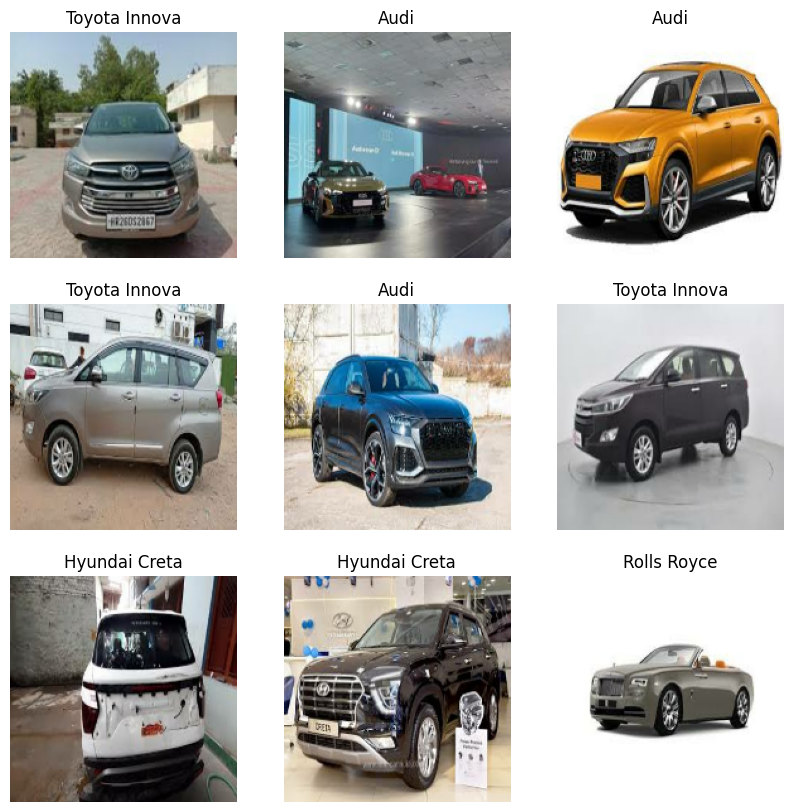

In [ ]:
# plot 9 images of cars
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

we can see there are many images with white background or with different background

In [ ]:
# converted shape of data
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
# suffle dataset
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# simple sequential model
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
# compile model with adom optimizer and loss = sparse categorical cross entropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# printing model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 90, 90, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                 

In [ ]:
# tryed different epochs but getting less accuracy because dataset per class is very less
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
84/84 [==============================] - 8s 61ms/step - loss: 1.8449 - accuracy: 0.2878 - val_loss: 1.7406 - val_accuracy: 0.3418
Epoch 2/25
84/84 [==============================] - 4s 52ms/step - loss: 1.5327 - accuracy: 0.4426 - val_loss: 1.4375 - val_accuracy: 0.4896
Epoch 3/25
84/84 [==============================] - 4s 52ms/step - loss: 1.1692 - accuracy: 0.5854 - val_loss: 1.2602 - val_accuracy: 0.5925
Epoch 4/25
84/84 [==============================] - 4s 52ms/step - loss: 0.7713 - accuracy: 0.7424 - val_loss: 1.1449 - val_accuracy: 0.6313
Epoch 5/25
84/84 [==============================] - 5s 55ms/step - loss: 0.4453 - accuracy: 0.8479 - val_loss: 1.1742 - val_accuracy: 0.6313
Epoch 6/25
84/84 [==============================] - 4s 53ms/step - loss: 0.2224 - accuracy: 0.9265 - val_loss: 1.2902 - val_accuracy: 0.6358
Epoch 7/25
84/84 [==============================] - 4s 53ms/step - loss: 0.1063 - accuracy: 0.9657 - val_loss: 1.6397 - val_accuracy: 0.6373
Epoch 8/25
84

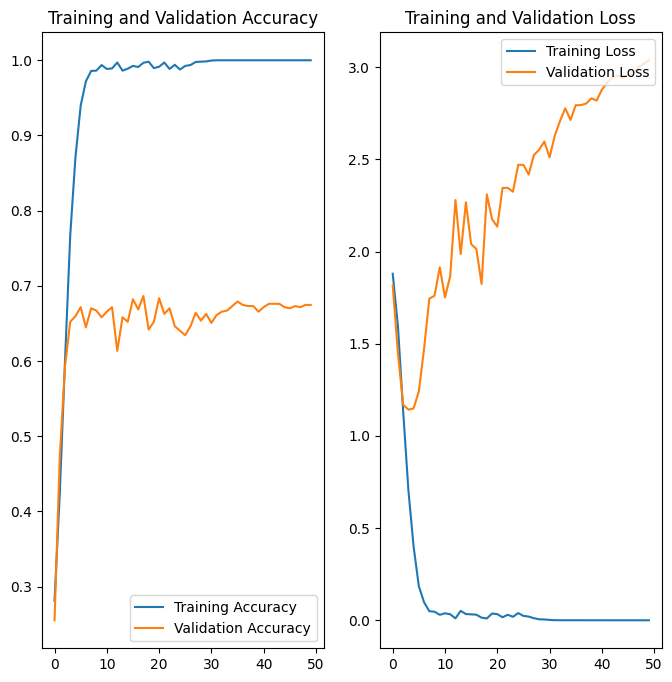

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# some dara argumantation for improving accuracy
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

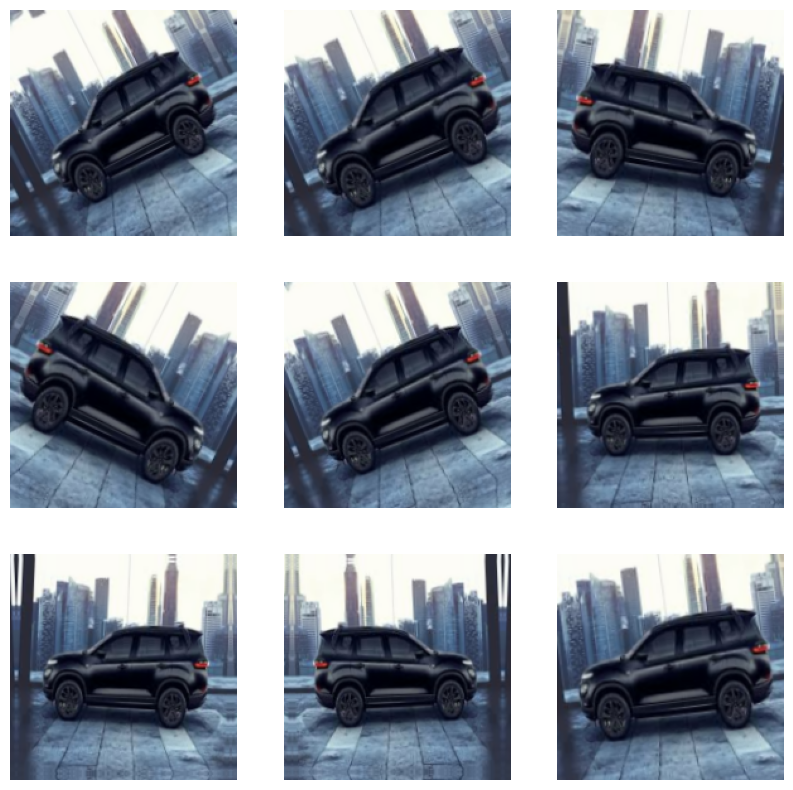

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
#  with data argumentation
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

In [ ]:
# here  i have got more accuracy then previous one ,we can increase accuracy using large datasets
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
84/84 [==============================] - 5s 31ms/step - loss: 1.7843 - accuracy: 0.3162 - val_loss: 1.6559 - val_accuracy: 0.4343
Epoch 2/25
84/84 [==============================] - 3s 31ms/step - loss: 1.6574 - accuracy: 0.3848 - val_loss: 1.5435 - val_accuracy: 0.4254
Epoch 3/25
84/84 [==============================] - 2s 30ms/step - loss: 1.5317 - accuracy: 0.4321 - val_loss: 1.4696 - val_accuracy: 0.4776
Epoch 4/25
84/84 [==============================] - 2s 29ms/step - loss: 1.4242 - accuracy: 0.4836 - val_loss: 1.3843 - val_accuracy: 0.5075
Epoch 5/25
84/84 [==============================] - 2s 29ms/step - loss: 1.3365 - accuracy: 0.5116 - val_loss: 1.2194 - val_accuracy: 0.5567
Epoch 6/25
84/84 [==============================] - 2s 29ms/step - loss: 1.2297 - accuracy: 0.5526 - val_loss: 1.1523 - val_accuracy: 0.5701
Epoch 7/25
84/84 [==============================] - 3s 31ms/step - loss: 1.1633 - accuracy: 0.5928 - val_loss: 1.2734 - val_accuracy: 0.5507
Epoch 8/25
84

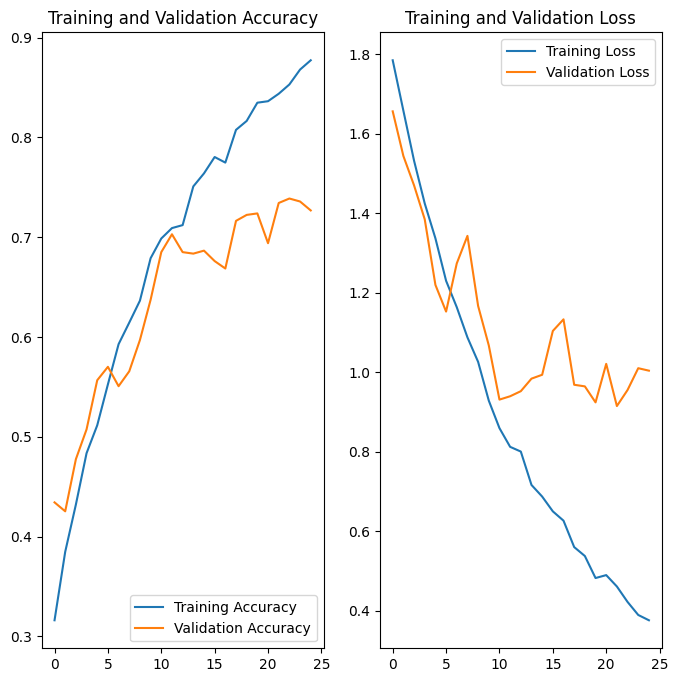

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

# test with  images of test dataset
# change test path
test_path ="/content/drive/MyDrive/Deep Learning/car classfication/Cars Dataset/test/Audi/1027.jpg"
img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 534ms/step
This image most likely belongs to Audi with a 99.96 percent confidence.


In [ ]:
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [ ]:
test_path ="/content/drive/MyDrive/Deep Learning/car classfication/Cars Dataset/test/Toyota Innova/1232.jpg"
img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to Toyota Innova with a 99.97 percent confidence.


In [ ]:
test_path ="/content/drive/MyDrive/Deep Learning/car classfication/Cars Dataset/test/Mahindra Scorpio/188.jpg"
img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to Mahindra Scorpio with a 94.80 percent confidence.


In [ ]:
test_path ="/content/drive/MyDrive/Deep Learning/car classfication/Cars Dataset/test/Hyundai Creta/208.jpg"
img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to Hyundai Creta with a 97.96 percent confidence.


In [ ]:
test_path ="/content/drive/MyDrive/Deep Learning/car classfication/Cars Dataset/test/Rolls Royce/386.jpg"
img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)),
    score,
    class_names
)

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to Audi with a 50.84 percent confidence. tf.Tensor(
[0.5084345  0.18490475 0.02858358 0.06758095 0.01422099 0.10378088
 0.09249441], shape=(7,), dtype=float32) ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


In [ ]:
test_path ="/content/drive/MyDrive/Deep Learning/car classfication/Cars Dataset/test/Swift/29.jpg"
img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to Swift with a 98.36 percent confidence.


In [ ]:
test_path ="/content/drive/MyDrive/Deep Learning/car classfication/Cars Dataset/test/Tata Safari/369.jpg"
img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 77ms/step
This image most likely belongs to Tata Safari with a 99.94 percent confidence.


<img src ="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ2A35R3o4gPR8TM9Ap0JfZVIJ6K4zfX93-9w&usqp=CAU"></img>
rolls royce

In [ ]:
test_path ="/content/images.jpg"
img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 44ms/step
This image most likely belongs to Audi with a 99.34 percent confidence.


In [ ]:
# thank you